## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import warnings
warnings.simplefilter('ignore')

from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras import applications
import os
import glob
import cv2

## Connect to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change the patha and Get the list of directory on drive path

In [3]:
# Change to the directory of interest
path = '/content/drive/MyDrive/Cassava_leaf'
os.chdir(path)

# List files in the directory
os.listdir(path)

['test', 'validation', 'train']

## Extra libraries

In [4]:
import keras
from keras import layers
# from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,GlobalAveragePooling2D,GlobalMaxPool2D,MaxPooling2D,MaxPool2D,Dropout
from keras.models import Model,Sequential

## Make glob file

In [5]:
train=glob.glob('//content//drive//MyDrive//Cassava_leaf//train//*')
train

['//content//drive//MyDrive//Cassava_leaf//train/Healthy',
 '//content//drive//MyDrive//Cassava_leaf//train/Common_Rust',
 '//content//drive//MyDrive//Cassava_leaf//train/Gray_Leaf_Spot',
 '//content//drive//MyDrive//Cassava_leaf//train/Blight']

In [6]:
glob.glob('//content//drive//MyDrive//Cassava_leaf//train//Blight//*')

['//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (97).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (96).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (98).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (99).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (92).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (93).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (88).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (9).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (94).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (95).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (89).jpg',
 '//content//drive//MyDrive//Cassava_leaf//train//Blight/Corn_Blight (86).jpg',
 '//content//drive//MyDrive//Cassava_leaf

## Check Image on train data

(256, 256, 3)


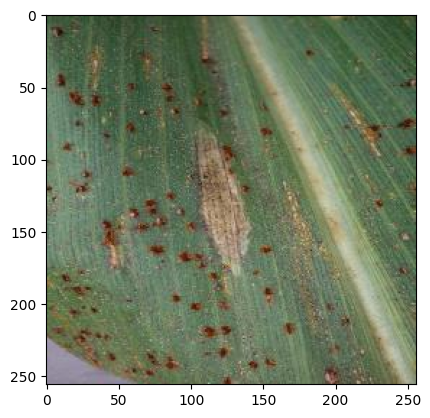

In [7]:
img = cv2.imread('//content//drive//MyDrive//Cassava_leaf//train//Blight//Corn_Blight (681).JPG')
print(img.shape)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

## Get the train classes

In [8]:
train_class=os.listdir('//content//drive//MyDrive//Cassava_leaf//train//')
train_class

['Healthy', 'Common_Rust', 'Gray_Leaf_Spot', 'Blight']

## Get the count of data as per class

In [9]:
count_dict1 = {}
img_dict1 = {}

# Loop through classes
for cls in train_class:  # Assuming class_names contains the list of dog classes
    image_path = glob.glob(f'//content//drive//MyDrive//Cassava_leaf//train//{cls}//*')
    count_dict1[cls] = len(image_path)

    if image_path:  # Check if image_path is not empty
        img_dict1[cls] = tf.keras.utils.load_img(random.choice(image_path))
count_dict1

{'Healthy': 820, 'Common_Rust': 920, 'Gray_Leaf_Spot': 436, 'Blight': 808}

In [10]:
df1 = pd.DataFrame(data={'label':count_dict1.keys(),'count':count_dict1.values()})

In [11]:
df1

,label,count
0,Healthy,820
1,Common_Rust,920
2,Gray_Leaf_Spot,436
3,Blight,808


## Visualize the count as per class

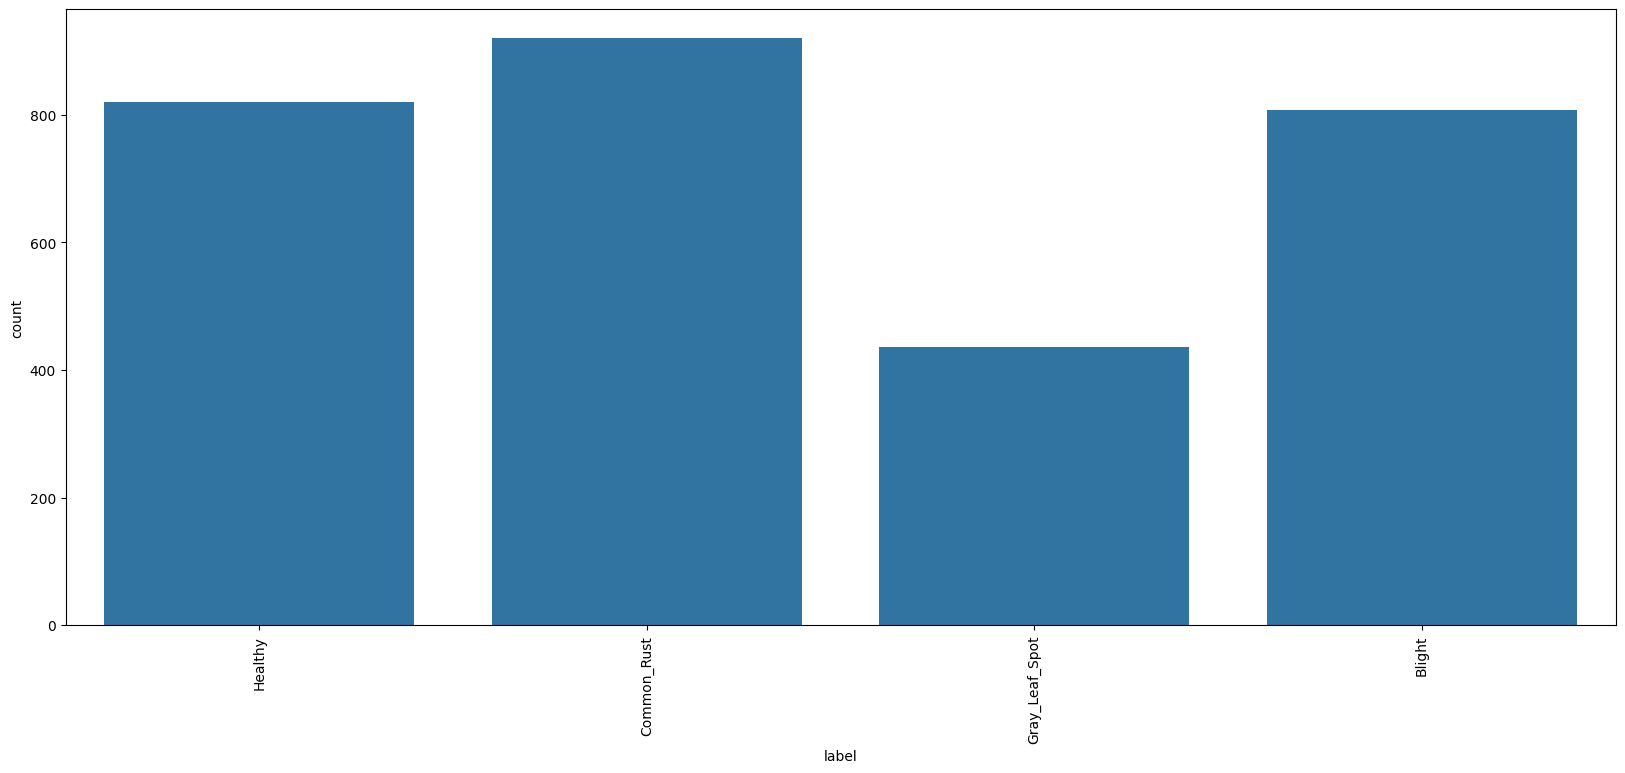

In [12]:
plt.figure(figsize=(20,8))
sns.barplot(x='label',y='count',data=df1)
plt.xticks(rotation=90)
plt.show()

## Visualize the image as per class

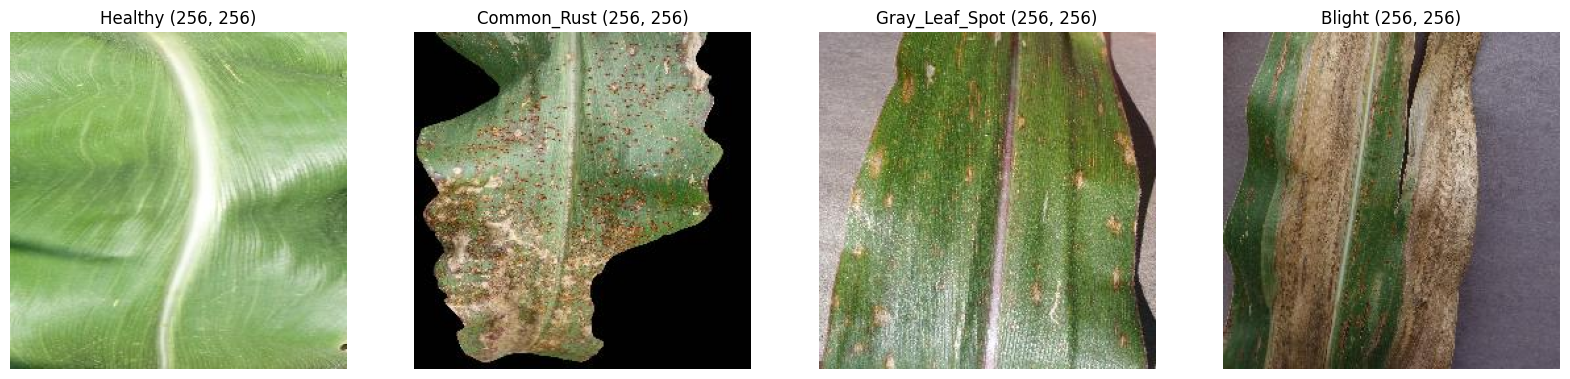

In [13]:
import math

num_items = len(img_dict1)
num_cols = 4
num_rows = math.ceil(num_items / num_cols)

plt.figure(figsize=(20, 5 * num_rows))  # Adjust the figure size based on the number of rows

for id, (label, img) in enumerate(img_dict1.items()):
    plt.subplot(num_rows, num_cols, id + 1)
    plt.imshow(img)
    plt.title(f"{label} {img.size}")
    plt.axis('off')

## Get the list of test classes

In [14]:
test_dir=os.listdir('//content//drive//MyDrive//Cassava_leaf//test')
test_dir

['Healthy', 'Gray_Leaf_Spot', 'Blight', 'Common_Rust']

In [15]:
img_dict={}
count_dict={}
for cls in test_dir:
    img_path=glob.glob(f'//content//drive//MyDrive//Cassava_leaf//test//{cls}/*')
    count_dict[cls]=len(img_path)
    if img_path:
        img_dict[cls]=tf.keras.utils.load_img(random.choice(img_path))
count_dict

{'Healthy': 166, 'Gray_Leaf_Spot': 54, 'Blight': 146, 'Common_Rust': 214}

## Visualize the image as per class on test

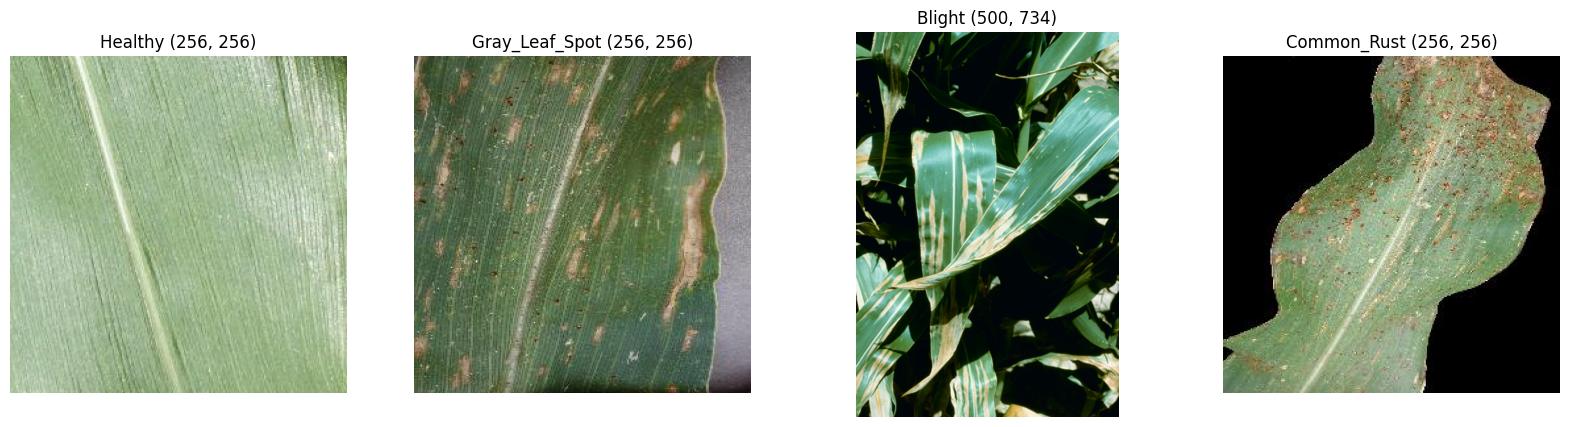

In [16]:
num_items=len(img_dict)
num_cols=4
num_rows=math.ceil(num_items/num_cols)
plt.figure(figsize=(20, 5* num_rows))
for id ,(label,img) in enumerate (img_dict.items()):
    plt.subplot(num_rows,num_cols, id + 1)
    plt.imshow(img)
    plt.title(f'{label} {img.size}')
    plt.axis('off')

## Data Preprecessing

In [17]:
train_data=tf.keras.utils.image_dataset_from_directory('//content//drive//MyDrive//Cassava_leaf//train',label_mode='categorical',shuffle=False)
test_data=tf.keras.utils.image_dataset_from_directory('//content//drive//MyDrive//Cassava_leaf//test',shuffle=False,label_mode='categorical')
validation_data=tf.keras.utils.image_dataset_from_directory('//content//drive//MyDrive//Cassava_leaf//validation',label_mode='categorical',shuffle=False)

Found 2984 files belonging to 4 classes.
Found 580 files belonging to 4 classes.
Found 624 files belonging to 4 classes.


In [18]:
width = 224
height = 224
channels = 3

data_preprocessing = tf.keras.Sequential([
    tf.keras.layers.Resizing(height, width),
    tf.keras.layers.Rescaling(1.0 / 255),

])

In [19]:
train_ds=train_data.map(lambda x,y:(data_preprocessing(x),y))
test_ds=test_data.map(lambda x,y:(data_preprocessing(x),y))
valid_ds=validation_data.map(lambda x,y:(data_preprocessing(x),y))

In [20]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [21]:
test_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [22]:
valid_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

## Model

In [23]:
model = Sequential()
# Convolutional layers with MaxPooling
model.add(Conv2D(input_shape=(224,224,3), filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# flatten the image into a 1D array using the Flatten layer
model.add(Flatten())
# Fully connected layers
# model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=256, activation="relu"))

# Output layer with 100 units and softmax activation for multi-class classification
model.add(Dense(units=4, activation="softmax"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)      

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])

In [26]:
from keras.callbacks import EarlyStopping

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## Data Augmentation

In [28]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [29]:
batch_size = 40
# this is the augmentation configuration we will use for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen = test_datagen.flow_from_directory('//content//drive//MyDrive//Cassava_leaf//test',
                                      class_mode = "categorical",
                                      target_size = (224, 224),
                                      batch_size = batch_size,
                                      shuffle = False,
                                      seed = 42)

# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '//content//drive//MyDrive//Cassava_leaf//train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized
        batch_size=batch_size,
        class_mode='categorical',
shuffle = True,  seed = 42)
# this is a similar generator, for validation data

Found 580 images belonging to 4 classes.
Found 2984 images belonging to 4 classes.


In [30]:
# Assuming validation_generator is your validation data generator
batch_images, batch_labels = next(train_generator)

# Print the shape of the batch
print("Batch images shape:", batch_images.shape)
print("Batch labels shape:", batch_labels.shape)

Batch images shape: (40, 224, 224, 3)
Batch labels shape: (40, 4)


In [31]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
validation_generator = val_datagen.flow_from_directory(
        '//content//drive//MyDrive//Cassava_leaf//validation',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = False,seed = 42 )

Found 624 images belonging to 4 classes.


In [32]:
# Assuming validation_generator is your validation data generator
batch_images, batch_labels = next(validation_generator)

# Print the shape of the batch
print("Batch images shape:", batch_images.shape)
print("Batch labels shape:", batch_labels.shape)

Batch images shape: (40, 224, 224, 3)
Batch labels shape: (40, 4)


In [33]:
history=model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=500 // batch_size,callbacks=early_stopping)

Epoch 1/10
75/75 [==============================] - 859s 11s/step - loss: 57.8784 - accuracy: 0.6408 - precision: 0.6981 - recall: 0.5627 - val_loss: 0.4644 - val_accuracy: 0.7917 - val_precision: 0.7970 - val_recall: 0.7688
Epoch 2/10
75/75 [==============================] - 53s 699ms/step - loss: 0.4529 - accuracy: 0.8060 - precision: 0.8297 - recall: 0.7755 - val_loss: 0.3448 - val_accuracy: 0.8417 - val_precision: 0.8432 - val_recall: 0.8292
Epoch 3/10
75/75 [==============================] - 50s 670ms/step - loss: 0.3903 - accuracy: 0.8338 - precision: 0.8518 - recall: 0.8090 - val_loss: 0.3160 - val_accuracy: 0.8542 - val_precision: 0.8608 - val_recall: 0.8500
Epoch 4/10
75/75 [==============================] - 52s 693ms/step - loss: 0.3971 - accuracy: 0.8428 - precision: 0.8624 - recall: 0.8194 - val_loss: 0.5039 - val_accuracy: 0.7375 - val_precision: 0.7431 - val_recall: 0.7292
Epoch 5/10
75/75 [==============================] - 52s 699ms/step - loss: 0.3352 - accuracy: 0.8562

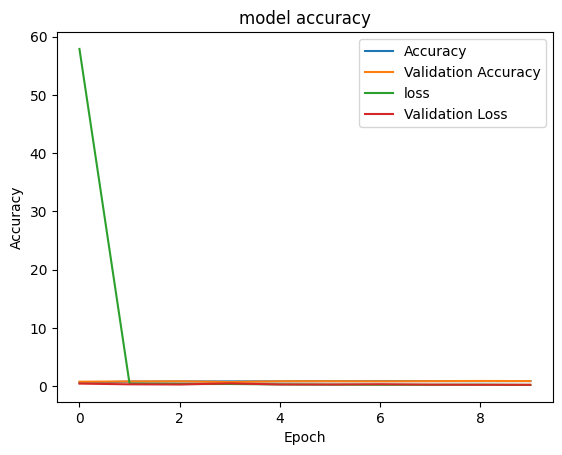

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Conclusion:

### We have got 90% acuracy and 89% validation accuracy

## Import libraries

In [35]:
# Import libaries
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications.xception import Xception

## Xception Model

In [36]:
# Create Xception base model
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))

83683744/83683744 [==============================] - 0s 0us/step


In [37]:
# Create a Sequential model
model_xception = Sequential()

# Adding the Xception base model
model_xception.add(base_model_xception)

# Adding Global Average Pooling 2D layer
model_xception.add(GlobalAveragePooling2D())

# Adding a Dense layer with 1024 units and 'relu' activation
# model_xception.add(Dense(1024, activation='relu'))

# Adding Dropout layer with a dropout rate of 0.5
model_xception.add(Dropout(0.25))

# Adding another Dense layer with 512 units and 'relu' activation
# model_xception.add(Dense(512, activation='relu'))

# Adding Dropout layer with a dropout rate of 0.3
# model_xception.add(Dropout(0.3))

# Adding the final Dense layer with 100 units and 'softmax' activation
model_xception.add(Dense(4, activation='softmax'))

In [38]:
# Define RMSprop optimizer with specific parameters
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)

In [39]:
model_xception.compile(optimizer='adam',loss='categorical_crossentropy'
                 ,metrics=['accuracy','Precision','Recall'])

In [40]:
model_xception.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 20869676 (79.61 MB)
Trainable params: 20815148 (79.40 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [41]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [42]:
history2=model_xception.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        callbacks=[early_stopping, reduce_lr])

Epoch 1/10
75/75 [==============================] - 143s 1s/step - loss: 0.3180 - accuracy: 0.8817 - precision: 0.9255 - recall: 0.8415 - val_loss: 0.6352 - val_accuracy: 0.7965 - val_precision: 0.8033 - val_recall: 0.7917 - lr: 0.0010
Epoch 2/10
75/75 [==============================] - 65s 860ms/step - loss: 0.1770 - accuracy: 0.9316 - precision: 0.9426 - recall: 0.9196 - val_loss: 0.2777 - val_accuracy: 0.9263 - val_precision: 0.9349 - val_recall: 0.9199 - lr: 0.0010
Epoch 3/10
75/75 [==============================] - 66s 871ms/step - loss: 0.1666 - accuracy: 0.9400 - precision: 0.9497 - recall: 0.9310 - val_loss: 0.7940 - val_accuracy: 0.8750 - val_precision: 0.8803 - val_recall: 0.8718 - lr: 0.0010
Epoch 4/10
75/75 [==============================] - 69s 911ms/step - loss: 0.1375 - accuracy: 0.9511 - precision: 0.9557 - recall: 0.9460 - val_loss: 0.1109 - val_accuracy: 0.9583 - val_precision: 0.9614 - val_recall: 0.9567 - lr: 0.0010
Epoch 5/10
75/75 [==============================] 

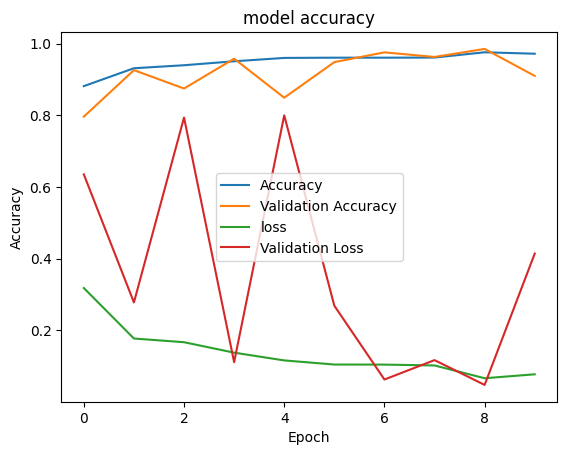

In [43]:
import matplotlib.pyplot as plt
plt.plot(history2.history["accuracy"])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Conclusion:

### We have got 97% acuracy and 91% validation accuracy

## Import libraries

### ResNet50 Model

In [44]:
from tensorflow.keras.applications import EfficientNetB0
# Load the EfficientNetB0 model pre-trained on ImageNet
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))

16705208/16705208 [==============================] - 0s 0us/step


In [45]:
# Freeze the base model layers (optional, can be fine-tuned later)
for layer in base_model.layers:
    layer.trainable = False

In [49]:
# Create a new model
model = Sequential()

# Add the pre-trained VGG16 base model
model.add(base_model)
model.add(GlobalAveragePooling2D())
# Add a dense layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

# Add a dense layer with the number of output classes and softmax activation
model.add(Dense(4, activation='softmax'))

In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy'
                 ,metrics=['accuracy','Precision','Recall'])

In [51]:
history2=model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        callbacks=[early_stopping, reduce_lr])

Epoch 1/10
75/75 [==============================] - 69s 818ms/step - loss: 0.3411 - accuracy: 0.8643 - precision: 0.8980 - recall: 0.8412 - val_loss: 0.1313 - val_accuracy: 0.9663 - val_precision: 0.9692 - val_recall: 0.9583 - lr: 0.0010
Epoch 2/10
75/75 [==============================] - 52s 697ms/step - loss: 0.1849 - accuracy: 0.9256 - precision: 0.9332 - recall: 0.9179 - val_loss: 0.1233 - val_accuracy: 0.9583 - val_precision: 0.9613 - val_recall: 0.9551 - lr: 0.0010
Epoch 3/10
75/75 [==============================] - 53s 709ms/step - loss: 0.1504 - accuracy: 0.9383 - precision: 0.9441 - recall: 0.9336 - val_loss: 0.1094 - val_accuracy: 0.9567 - val_precision: 0.9629 - val_recall: 0.9567 - lr: 0.0010
Epoch 4/10
75/75 [==============================] - 52s 699ms/step - loss: 0.1336 - accuracy: 0.9454 - precision: 0.9506 - recall: 0.9424 - val_loss: 0.1148 - val_accuracy: 0.9519 - val_precision: 0.9548 - val_recall: 0.9487 - lr: 0.0010
Epoch 5/10
75/75 [==============================

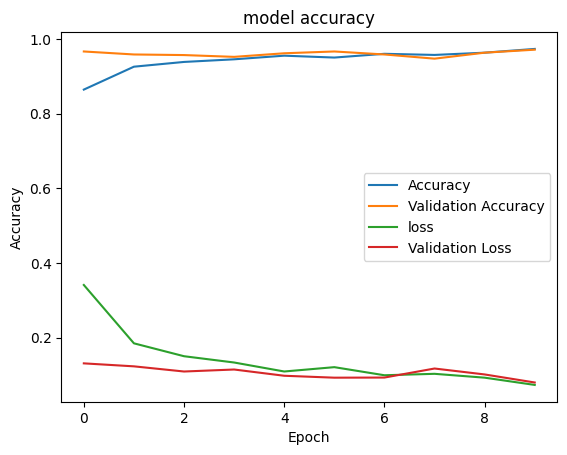

In [52]:
plt.plot(history2.history["accuracy"])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Conclusion:

### I have used 3 model to get best accuracy,
### 1) Con2d model: 90% on train and 89% on validation
### 2) Xception model: 97% on train 91% on validation
### 3) ResNet50 model gave best accuracy, got 97% on train and 97% validation